In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

### 1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

In [3]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [4]:
X_st = X.copy().astype(np.float64)
X_st[2] = calc_std_fit(X[2])
X_st[3] = calc_std_fit(X[3])

In [5]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W)
        
        if i % (iterations / 10) == 0:
            pass

    return W

In [6]:
lambdas = np.linspace(1e-4, 50, 100)
y_dat = []
for i in range(len(lambdas)):
    y_dat.append(eval_model_reg2(X_st, y, iterations=1000, alpha=1e-2, lambda_=lambdas[i]))

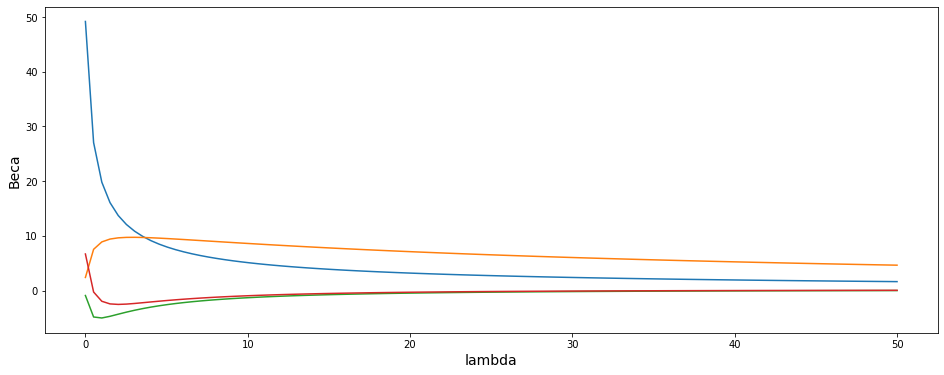

In [7]:
plt.figure(figsize=(16, 6))
plt.xlabel('lambda', fontsize=14)
plt.ylabel('Веса', fontsize=14)
plt.plot(lambdas, y_dat)

plt.show()

При увеличении параметра лямбда веса уменьшаются.

### 2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [8]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W))
        
        if i % (iterations / 10) == 0:
            pass

    return W

In [9]:
eval_model_reg1(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

array([49.81441783,  2.22850837, -0.35619252,  6.57121361])

In [10]:
eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

array([49.80471763,  2.23092887, -0.35969939,  6.56909742])